# Exercise 3 - Group 4
- Matthias Egli
- Florian Bär
- Manuel Vogel
- Adrian Willi

In [1]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras import utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix

%matplotlib inline

## Loading the raw data

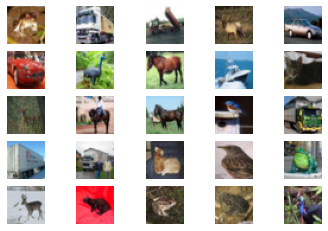

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    # show the plot
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

In [4]:
# check shape and type
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


In [5]:
# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
# number of classes
n_classes = 10

# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Simple CNN
### Define network

In [13]:
E = 30
B = 128
D = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
    
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


### Compile and train the network


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 31s 76ms/step - loss: 1.5935 - accuracy: 0.4424 - val_loss: 1.3874 - val_accuracy: 0.5238
Epoch 2/30
391/391 [==============================] - 29s 73ms/step - loss: 1.3002 - accuracy: 0.5494 - val_loss: 1.2395 - val_accuracy: 0.5698
Epoch 3/30
391/391 [==============================] - 29s 74ms/step - loss: 1.1976 - accuracy: 0.5872 - val_loss: 1.2321 - val_accuracy: 0.5699
Epoch 4/30
391/391 [==============================] - 29s 75ms/step - loss: 1.1318 - accuracy: 0.6103 - val_loss: 1.1659 - val_accuracy: 0.5973
Epoch 5/30
391/391 [==============================] - 29s 73ms/step - loss: 1.0837 - accuracy: 0.6274 - val_loss: 1.1253 - val_accuracy: 0.6113
Epoch 6/30
391/391 [==============================] - 29s 74ms/step - loss: 1.0404 - accuracy: 0.6421 - val_loss: 1.0898 - val_accuracy: 0.6235
Epoch 7/30
391/391 [==============================] - 28s 73ms/step - loss: 1.0079 - accuracy: 0.6537 - val_loss: 1.1038 - val_accuracy:

### Evaluate the network

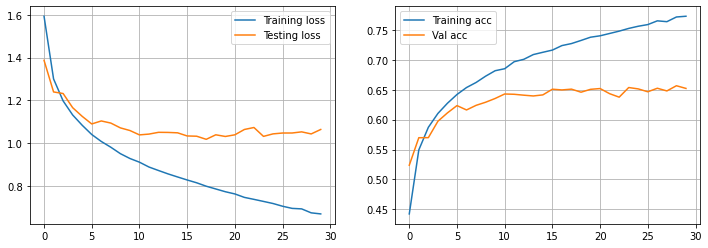

In [15]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

### Overall accuracy 

In [16]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.6324	 accuracy: 0.7898
TEST: 	 loss: 1.0640	 accuracy: 0.6522


## Deeper CNN

In [7]:
E = 30
B = 128
D = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 79s 199ms/step - loss: 1.4699 - accuracy: 0.5121 - val_loss: 1.4640 - val_accuracy: 0.4875
Epoch 2/30
391/391 [==============================] - 70s 180ms/step - loss: 1.0602 - accuracy: 0.6399 - val_loss: 1.2326 - val_accuracy: 0.5941
Epoch 3/30
391/391 [==============================] - 86s 221ms/step - loss: 0.9172 - accuracy: 0.6874 - val_loss: 1.1315 - val_accuracy: 0.6245
Epoch 4/30
391/391 [==============================] - 89s 226ms/step - loss: 0.8275 - accuracy: 0.7176 - val_loss: 1.1690 - val_accuracy: 0.6249
Epoch 5/30
391/391 [==============================] - 88s 226ms/step - loss: 0.7567 - accuracy: 0.7382 - val_loss: 1.0273 - val_accuracy: 0.6714
Epoch 6/30
391/391 [==============================] - 92s 236ms/step - loss: 0.7007 - accuracy: 0.7588 - val_loss: 1.1273 - val_accuracy: 0.6404
Epoch 7/30
391/391 [==============================] - 87s 223ms/step - loss: 0.6510 - accuracy: 0.7748 - val_loss: 1.1221 - val_ac

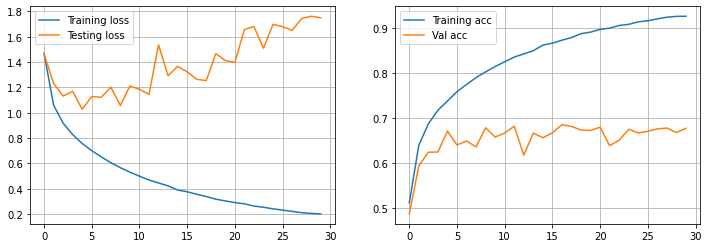

In [10]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

In [11]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.2289	 accuracy: 0.9145
TEST: 	 loss: 1.7490	 accuracy: 0.6775


In [12]:
E = 50
B = 128
D = X_train.shape[1:]

## reference implementation from https://gist.github.com/josefelixsandoval/fad43016c9bca96ea529a2ff4340eba3 to have a comparison
model = Sequential()

# Add layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(BatchNormalization())

# Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)      

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
391/391 [==============================] - 175s 444ms/step - loss: 1.6207 - accuracy: 0.4103 - val_loss: 4.2609 - val_accuracy: 0.1015
Epoch 2/50
391/391 [==============================] - 169s 433ms/step - loss: 1.1868 - accuracy: 0.5723 - val_loss: 1.1947 - val_accuracy: 0.5672
Epoch 3/50
391/391 [==============================] - 168s 429ms/step - loss: 0.9768 - accuracy: 0.6543 - val_loss: 1.1374 - val_accuracy: 0.6295
Epoch 4/50
391/391 [==============================] - 173s 441ms/step - loss: 0.8598 - accuracy: 0.6997 - val_loss: 0.8617 - val_accuracy: 0.7057
Epoch 5/50
391/391 [==============================] - 167s 426ms/step - loss: 0.7786 - accuracy: 0.7266 - val_loss: 0.7455 - val_accuracy: 0.7404
Epoch 6/50
391/391 [==============================] - 168s 429ms/step - loss: 0.7116 - accuracy: 0.7515 - val_loss: 1.0636 - val_accuracy: 0.6623
Epoch 7/50
391/391 [==============================] - 168s 430ms/step - loss: 0.6670 - accuracy: 0.7670 - val_loss: 0.7404 -

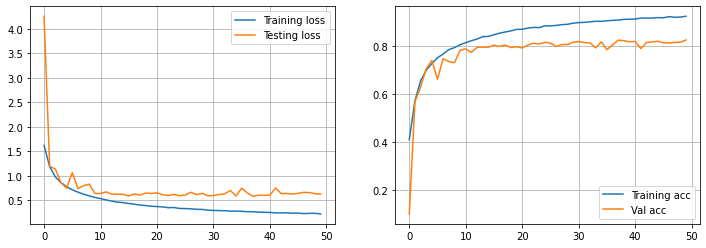

In [14]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

In [15]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.0627	 accuracy: 0.9853
TEST: 	 loss: 0.6256	 accuracy: 0.8254


| Id | Architecture description | Acc. train | Acc. test |
|-----|--------------------------|------------|-----------|
|  1 | INPUT -> CONV -> RELU -> POOL -> FC | 0.7898  | 0.6522 |
|  2 | INPUT -> \[CONV -> RELU -> POOL\]\*2 -> FC | 0.9145  | 0.6775 |
|  3 | INPUT -> \[CONV -> RELU\]\*2 -> POOL -> DROP -> \[CONV -> RELU -> POOL\]\*2 -> POOL -> FC -> RELU -> DROP -> FC | 0.  | 0. |